In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import special_ortho_group
from scipy.constants import golden

N = 10*1000*1000 #Number of iterations for Monte Carlo simulations

# Monte Carlo simulation for estimating the value of $\pi$

- We generate $1000$ random $x$ and $y$ values between $0$ and $1$ using the RAND() function in Excel (or LibreOffice) spreadsheet.\
These form the $(x,y)$ coordinates of $1000$ points chosen uniformly at random from a unit square.\
The values have been stored in *montecarlo_simulation_pi.ods*.

- We plot the points below in the unit square and colour the points red if they lie within the largest circle inscribed in the square and colour the points blue if they lie outside the circle.

<h4 align="center">Area of unit square with vertices (0,0), (0,1), (1,0), (1,1) = 1</h4>
<h4 align="center">Area of circle with center $(\frac{1}{2},\frac{1}{2})$ and radius $\frac{1}{2} = \pi(\frac{1}{2})^2 = \frac{\pi}{4}$</h4>


- The proportion of the red points to the total number of points is an estimate of $\frac{\pi}{4}$.\
Therefore, 4 times the proportion of red points to the total number of points is an estimate of $\pi$.

- The spreadsheet has an indicator column denoting a point by 1 (or 0) to indicate if the point lies inside the circle (or outside respectively).\
We calculate the estimates of $\pi$ as we generate points, using AVERAGE() in the spreadsheet and plot the graph below.\
As we generate more points, we get eventually better estimates of $\pi$.\
We also compute the unbiased estimator of the standard deviation using STDEV() in the spreadsheet.

- We print the value of $\pi$ stored in numpy to 14 decimal places of precision and compare the estimate we get.

In [3]:
file = pd.read_excel('montecarlo_simulation_pi.ods')
x_1 = file.loc[file['Indicator']==1,'X-coordinate']
y_1 = file.loc[file['Indicator']==1,'Y-coordinate']
x_2 = file.loc[file['Indicator']==0,'X-coordinate']
y_2 = file.loc[file['Indicator']==0,'Y-coordinate']
plt.scatter(x_1,y_1,c="r")
plt.scatter(x_2,y_2,c="b")
plt.xlabel('x-coordinates', fontsize = 20)
plt.ylabel('y-coordinates', fontsize = 20)
plt.show()

m = file['Mean']
x = range(len(m))
plt.plot(x,m)
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \pi', fontsize = 20)
plt.show()
print("The value of \pi:", np.pi)
print("Estimate of \pi :", m.iloc[-1])

FileNotFoundError: [Errno 2] No such file or directory: '/Data/montecarlo_simulation_pi.ods'

# Another Monte Carlo simulation to estimate $\pi$

- We take the idea described above and run the simulation for $N$ points where $N$ has been initialized above to $10^7$.\
Unlike the values stored in the spreadsheet for the above simulation, we now get different estimates of $\pi$ each time we run the code.

- We plot the points in the circle with red and points outside the circle with blue.\
We print the value of $\pi$ stored in numpy to 14 decimal places of precision and compare the estimate we get.

- We expect the estimate of $\pi$ to now be much better since we have run the simulation with $10^7$ points instead of $1000$ points.

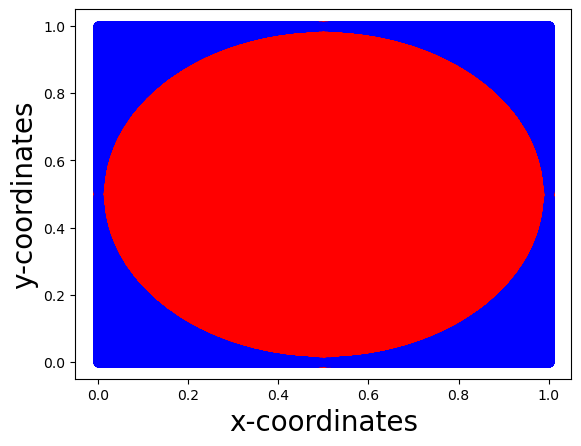

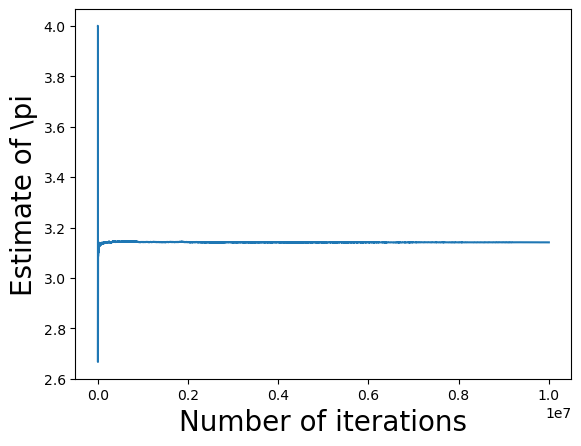

The actual value of \pi (as stored in numpy): 3.141592653589793
Estimate of \pi after 10000000 iterations   : 3.1411072


In [3]:
x_all=np.random.uniform(0,1,N)
y_all=np.random.uniform(0,1,N)
x_1,x_2,y_1,y_2,e=[],[],[],[],[]
r=pow(0.5,2)
for i in range(N):
    if pow(x_all[i]-0.5,2)+pow(y_all[i]-0.5,2)<=r:
        x_1.append(x_all[i])
        y_1.append(y_all[i])
    else:
        x_2.append(x_all[i])
        y_2.append(y_all[i])
    e.append(len(x_1)/(i+1))

plt.scatter(x_1,y_1,c="r")
plt.scatter(x_2,y_2,c="b")
plt.xlabel('x-coordinates', fontsize = 20)
plt.ylabel('y-coordinates', fontsize = 20)
plt.show()

plt.plot(range(N),[i*4 for i in e])
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \pi', fontsize = 20)
plt.show()
print("The actual value of \pi (as stored in numpy):",np.pi)
print("Estimate of \pi after",N,"iterations   :", e[-1]*4)

# A different Monte Carlo simulation to geometrically estimate $\pi$

- We drop $N$ needles of length $2l$ each, on a graph sheet whose vertical and horizontal lines are spaced one unit apart.\
We count how many of the needles cross the horizontal lines on the graph sheet.\
We also count how many of the needles cross the vertical lines on the graph sheet.

<h4 align="center">Probability of a needle crossing a horizontal line = $\frac{4l}{\pi}$</h4>
<h4 align="center">Probability of a needle crossing a vertical line = $\frac{4l}{\pi}$</h4>
<h4 align="center">Probability of a needle crossing a horizontal line or a vertical line= $\frac{8l}{\pi}$</h4>


- Therefore, if we run a Monte Carlo simulation by dropping $N=10^7$ needles and choose the needle length as $2l=\frac{1}{2}$, we get

<h4 align="center">Probability of a needle crossing a horizontal line = $\frac{1}{\pi}$</h4>
<h4 align="center">Probability of a needle crossing a vertical line = $\frac{1}{\pi}$</h4>
<h4 align="center">Probability of a needle crossing a horizontal line or a vertical line= $\frac{2}{\pi}$</h4>

- Hence, the average number of horizontal (or vertical) line crossings gives the inverse of estimate of $\pi$.\
The average number of line crossings (which includes both horizontal and vertical crossings) gives the inverse of the estimate of $\frac{2}{\pi}$\
So we use the inverse of these estimates to get an estimate of $\pi$.

**Remarks about implementation**

- We only require the length of the needle to be smaller than one unit.\
Calculations become easier if we set $l=\frac{1}{4}$ (but we could do all of this with other values of $l$).

- We choose a needle whose ends are positioned at $(0,0)$ and $(\frac{1}{2},0)$.\
We then rotate the needle by choosing a 2D-rotation matrix uniformly at random using *special_ortho_group.rvs(2)* from *scipy.stats*.\
By implementing this way, we never explicitly use $\pi$ to rotate the needle.

- We restrict our attention to the graph sheet between $(0,0)$ and $(10,10)$.\
The answer doesn't depend on which part of the graph sheet we focus on.\
The needle was translated horizontally and vertically, in a uniform random manner from the origin, after rotation.

- In the picture below, we show how the first $25$ needles fall on the graph sheet.\
We are dropping $N=10^7$ needles but it is easier to see the first $25$ needles on the graph sheet.\
The value of the variable *plot_needles* can be changed below to show a different number of needles in the picture.

- If $N$ is very small, then we run the risk of division by $0$ when we invert estimates since there might not be any horizontal or vertical crossings.

Number of horizontal crossings in the first 25 needles dropped   : 10
Number of vertical crossings in the first 25 needles dropped     : 9
Number of horizontal crossings among all 10000000 needles dropped: 3183988
Number of vertical crossings among all 10000000 needles dropped  : 3183142


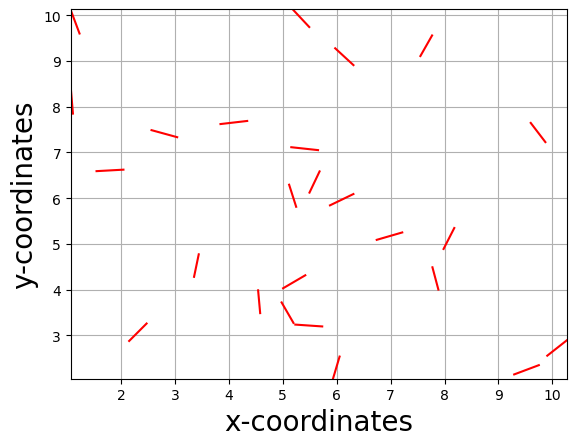

The actual value of \pi (as stored in numpy) for comparison with the estimates we get below: 3.141592653589793
Estimate of \pi after 10000000 iterations by counting number of horizontal crossings       : 3.1407153544548536
Estimate of \pi after 10000000 iterations by counting number of vertical crossings         : 3.1415500785073363
Estimate of \pi after 10000000 iterations by counting both horizontal & vertical crossings : 3.1411326610262393


In [4]:
#N=1000 #Can change N here if we want to run Monte Carlo simulation on smaller number of iterations.
l=1/4 #The length of each needle which is 2*l can be adjusted here.
h,v=0,0
data=[]
plot_needles = 25 #Number of needles in picture below can be adjusted here.
for i in range(N):
    m=special_ortho_group.rvs(2) #Random rotation matrix is chosen here to rotate needle.
    x1 = 1+9*np.random.uniform(0,1) 
    y1 = 1+9*np.random.uniform(0,1)
    ndl=np.dot(m,[2*l,0])
    x2,y2=ndl[0]+x1,ndl[1]+y1
    if np.floor(x1)!= np.floor(x2):
        h+=1
    if np.floor(y1)!= np.floor(y2):
        v+=1
    if i<np.min([plot_needles,N]):
        h_min=h
        v_min=v
        data.append((x1,x2))
        data.append((y1,y2))
        data.append('r')
        
print("Number of horizontal crossings in the first",plot_needles,"needles dropped   :",h_min)
print("Number of vertical crossings in the first",plot_needles,"needles dropped     :",v_min)
print("Number of horizontal crossings among all",N,"needles dropped:",h)
print("Number of vertical crossings among all",N,"needles dropped  :",v)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.margins(x=0, y=0)
grid_points = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ax.xaxis.set_ticks(grid_points)
ax.yaxis.set_ticks(grid_points)
plt.plot(*data)
plt.grid()
plt.xlabel('x-coordinates', fontsize = 20)
plt.ylabel('y-coordinates', fontsize = 20)
plt.show()

print("The actual value of \pi (as stored in numpy) for comparison with the estimates we get below:",np.pi)
print("Estimate of \pi after",N,"iterations by counting number of horizontal crossings       :",4*l*N/h)
print("Estimate of \pi after",N,"iterations by counting number of vertical crossings         :",4*l*N/v)
print("Estimate of \pi after",N,"iterations by counting both horizontal & vertical crossings :",8*l*N/(h+v))

# Monte Carlo simulation to estimate Euler's number $e$

- A simulation consists of picking numbers uniformly at random from $(0,1)$ interval until the sum of the numbers exceeds 1.\
The expected number of numbers we need to pick turns out to be Euler's number $e$.\
We run this simulation $N$ times.

- The average value of the number of numbers we pick in each simulation gives us an estimate of $e$.\
We plot a graph showing how our estimate of $e$ gets refined over the many simulations.\
We print the value of $e$ stored in numpy to 14 decimal places of precision and compare the estimate we get.

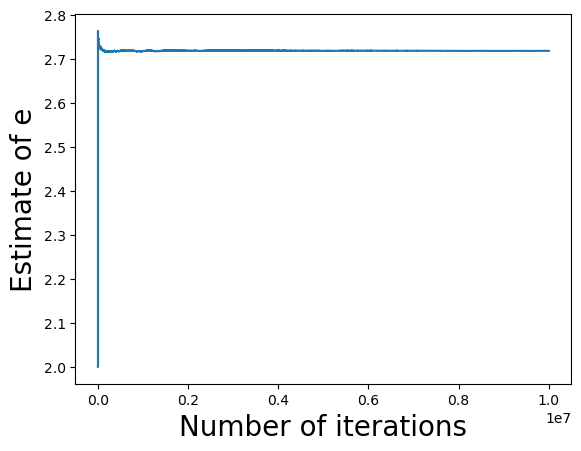

The actual value of Euler's number e (as stored in numpy): 2.718281828459045
Estimate of Euler's number e after 10000000 iterations   : 2.7181515


In [5]:
est=[]
prev_sum=0
for i in range(N):
    s=0
    n=0
    while s<=1:
        s=s+np.random.uniform(0,1)
        n=n+1
    prev_sum=prev_sum+n
    est.append(prev_sum/(i+1))
    
plt.plot(range(N),est)
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of e', fontsize = 20)
plt.show()

print("The actual value of Euler's number e (as stored in numpy):",np.e)
print("Estimate of Euler's number e after",N,"iterations   :",est[-1])

# Monte Carlo simulation to estimate Euler's constant $\gamma$

- The Gumbel distribution with parameters $\mu$ and $\beta$ is a distribution with cumulative distribution function given by
$$F(x) = e^{-e^{-\frac{(x-\mu)}{\beta}}}$$
- The Gumbel distribution has mean $\mu + \gamma\beta$ and variance $\frac{\pi^2}{6}\beta^2$ where $\gamma$ is Euler's constant.
- The quantile function (inverse cumulative distribution function) $Q(p)$ of a Gumbel distribution is given by
$$Q(p) = \mu - \beta\ln(-\ln(p))$$
- If $U$ is drawn uniformly at random from $(0,1)$, then $Q(U)$ has a Gumbel distribution with parameters $\mu$ and $\beta$.

**Remarks about implementation**
- We run $N$ simulations where we pick a value of $U$ uniformly at random from $(0,1)$ interval.
- We set $\mu=0$ and $\beta=1$ in the above formula and compute $Q(U)$.\
The expected value of $Q(U)$ is then $\mu+\gamma\beta = 0+\gamma(1) =\gamma$.

- We plot the estimate of expected values of $Q(U)$ as we run through the simulations.\
We print the value of Euler's constant $\gamma$ from numpy to compare with the estimate we get after $N$ simulations.

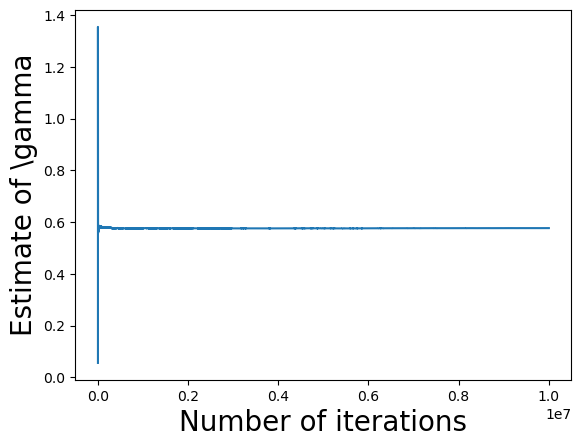

The actial value of Euler's constant \gamma (as stored in numpy): 0.5772156649015329
Estimate of Euler's constant \gamma after 10000000 iterations   : 0.5771671100939585


In [6]:
prev_sum=0
est=[]
for i in range(N):
    v=-np.log(-np.log(np.random.uniform(0,1)))
    prev_sum=prev_sum+v
    est.append(prev_sum/(i+1))
    
plt.plot(range(N),est)
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \gamma', fontsize = 20)
plt.show()

print("The actial value of Euler's constant \gamma (as stored in numpy):",np.euler_gamma)
print("Estimate of Euler's constant \gamma after",N,"iterations   :",est[-1])

# Monte Carlo simulation to geometically estimate $\sqrt2$

- A simulation consists of picking a point uniformly at random from $(0,2)$ interval and checking if its square is less than 2.\
The probability of a point on the $(0,2)$ interval to satisfy this condition is $\frac{\sqrt2}{2}=\frac{1}{\sqrt2}$.

- We run the simulation $N$ times.\
The average number of points satisfying the above condition gives an estimate of the inverse of $\sqrt2$.\
We use this to get an estimate of $\sqrt2$.

- We plot the estimate of $\sqrt2$ as we run through the simulations.\
We print the value of $\sqrt2$ from numpy to 14 decimal places of precision and compare the estimate we get.

- This method also works for other surds like $\sqrt3, \sqrt5$ etc.

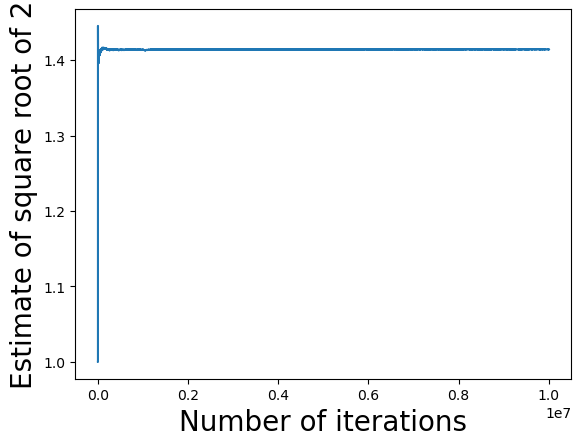

The actual value of the square root of 2 (from numpy) : 1.4142135623730951
Estimate of square root of 2 after 10000000 iterations: 1.41425332586419


In [7]:
n=0
est=[]
for i in range(N):
    x=2*np.random.uniform(0,1)
    if x*x<=2:
        n+=1
    est.append((i+1)/np.max([n,1]))

plt.plot(range(N),est)
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of square root of 2', fontsize = 20)
plt.show()

print("The actual value of the square root of 2 (from numpy) :",np.sqrt(2))
print("Estimate of square root of 2 after",N,"iterations:",est[-1])

# Monte Carlo simulation to estimate the golden ratio $\phi$

- For $a$, $b$ with $a>b>0$, we say $a$ is in golden ratio to $b$ if
$$\frac{a+b}{a} = \frac{a}{b} = \phi$$

- We choose $N$ values of $a$ and $N$ values of $b$ uniformly at random from $(0,1)$ interval.\
We plot these values $\frac{a+b}{a}$ in blue as we go through the simulations of picking different $a$, $b$ values.\
When the difference between $\frac{a+b}{a}$ and $\frac{a}{b}$ is smallest, we mark the value $\frac{a+b}{a}$ in red.\
The red point is our estimate for the golden ratio.

- We run the simulation $1000$ times instead of the earlier initialized $N=10^7$ times to see the plot better.\
The estimate should be reasonably good with just $1000$ iterations and it can be adjusted by changing variable *plot_N*.\
We print the value of the golden ratio from *scipy.constants* to compare with the estimate we get.

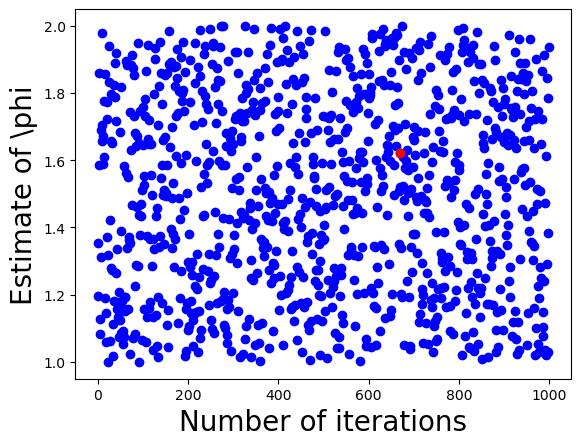

The value of the golden ratio \phi (as stored in scipy): 1.618033988749895
Estimate of the golden ratio \phi after 1000 iterations: 1.6212080336697916


In [8]:
plot_N=1000
m=1
est=[]
for i in range(plot_N):
    x=np.random.uniform(0,1)
    y=np.random.uniform(0,1)
    a=np.max([x,y])
    b=np.min([x,y])
    f1=(a+b)/a
    f2=a/b
    v=f1-f2
    if v>0 and v<m:
        m=v
        z=i
        ans=f1
    est.append(f1)
    
plt.scatter(range(plot_N),est,c="b")
plt.scatter([z],[ans],c="r")
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \phi', fontsize = 20)
plt.show()

print("The value of the golden ratio \phi (as stored in scipy):",golden)
print("Estimate of the golden ratio \phi after",plot_N,"iterations:",ans)

# Monte Carlo simulation to estimate the silver ratio $\delta_s$ (and $\sqrt2)$

- For $a$, $b$ with $a>b>0$, we say $a$ is in silver ratio to $b$ if
$$\frac{2a+b}{a} = \frac{a}{b} = \delta_s$$

- We choose $N$ values of $a$ and $N$ values of $b$ uniformly at random from $(0,1)$ interval.\
We plot these values $\frac{2a+b}{a}$ in blue as we go through the simulations of picking different $a$, $b$ values.\
When the difference between $\frac{2a+b}{a}$ and $\frac{a}{b}$ is smallest, we mark the value $\frac{2a+b}{a}$ in red.\
The red point is our estimate for the silver ratio.

- We run the simulation $1000$ times instead of the earlier initialized $N=10^7$ times to see the plot better.\
The estimate should be reasonably good with just $1000$ iterations and it can be adjusted by changing variable *plot_N*.\
We print the value of the silver ratio which we know is $\sqrt2+1$ to compare with the estimate we get.

- We can also use the estimate of $\delta_s$ that we get from this method to get an estimate of $\sqrt2$ as $\delta_s-1=\sqrt2$.

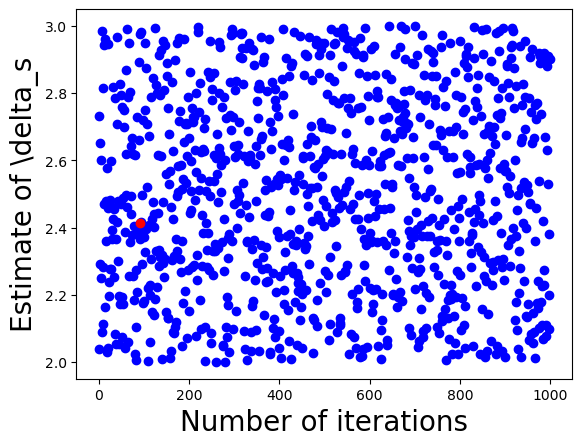

The actual value of the silver ratio \delta_s (from numpy) : 2.414213562373095
Estimate of the silver ratio \delta_s after 1000 iterations: 2.4145062062221543
The actual value of the square root of 2 (from numpy) : 1.4142135623730951
Estimate of the square root of 2 after 1000 iterations: 1.4145062062221543


In [9]:
plot_N=1000
m=1
est=[]
for i in range(plot_N):
    x=np.random.uniform(0,1)
    y=np.random.uniform(0,1)
    a=np.max([x,y])
    b=np.min([x,y])
    f1=(2*a+b)/a
    f2=a/b
    v=f1-f2
    if v>0 and v<m:
        m=v
        z=i
        ans=f1
    est.append(f1)
    
plt.scatter(range(plot_N),est,c="b")
plt.scatter([z],[ans],c="r")
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \delta_s', fontsize = 20)
plt.show()

print("The actual value of the silver ratio \delta_s (from numpy) :",1+np.sqrt(2))
print("Estimate of the silver ratio \delta_s after",plot_N,"iterations:",ans)
print("The actual value of the square root of 2 (from numpy) :",np.sqrt(2))
print("Estimate of the square root of 2 after",plot_N,"iterations:",ans-1)

# A different Monte Carlo simulation to geometrically estimate the silver ratio $\delta_s$ (and $\sqrt2)$

- We consider a unit square with vertices $(0,0), (1,0), (1,0), (1,1)$.\
We choose $N$ points uniformly at random from this unit square.

- The projection of any point $(x,y)$ to the line $y=x$ is given by $(\frac{x+y}{2},\frac{x+y}{2})$.\
We check if the projections of the randomly chosen points to the line $y=x$ is within unit distance from the origin.

- The points with projections within unit distance are marked in red and the rest in blue.\
The probability that a point is red is $\frac{2}{\delta_s}$.\
Hence, the expected number of red points is an estimate of $\frac{2}{\delta_s}$.\
We use this to get an estimate of $\delta_s$.

- We print the value of the silver ratio which we know is $\sqrt2+1$ to compare with the estimate we get.\
We can also use the estimate of $\delta_s$ that we get from this geometric method to get an estimate of $\sqrt2$ as $\delta_s-1=\sqrt2$.

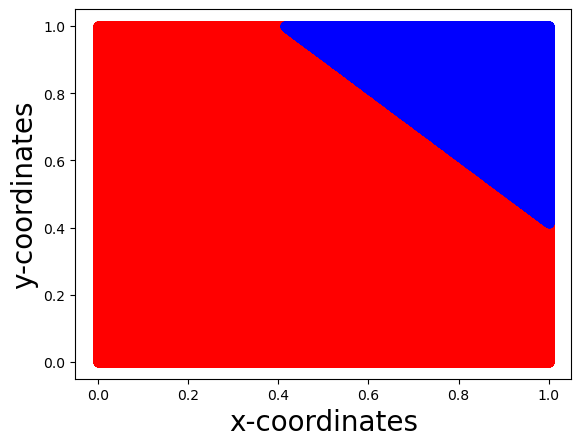

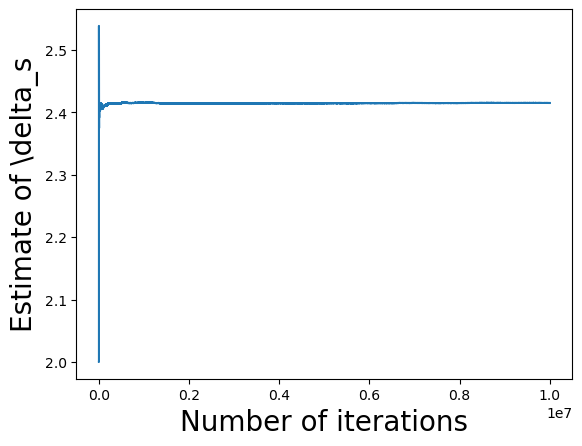

Value of the silver ratio \delta_s (from numpy): 2.414213562373095
Estimate of \delta_s after 10000000 iterations : 2.414973609168399
The actual value of the square root of 2 (from numpy) : 1.4142135623730951
Estimate of square root of 2 after 10000000 iterations: 1.414973609168399


In [10]:
x_1,x_2,y_1,y_2,s_2=[],[],[],[],[]
for i in range(N):
    x=np.random.uniform(0,1)
    y=np.random.uniform(0,1)
    if ((x+y)/2)**2+((x+y)/2)**2<=1:
        x_1.append(x)
        y_1.append(y)
    else:
        x_2.append(x)
        y_2.append(y)
    s_2.append(2*(i+1)/np.max([len(x_1),1]))
    
plt.scatter(x_1,y_1,c="r")
plt.scatter(x_2,y_2,c="b")
plt.xlabel('x-coordinates', fontsize = 20)
plt.ylabel('y-coordinates', fontsize = 20)
plt.show()

plt.plot(range(N),[i for i in s_2])
plt.xlabel('Number of iterations', fontsize = 20)
plt.ylabel('Estimate of \delta_s', fontsize = 20)
plt.show()

print("Value of the silver ratio \delta_s (from numpy):",1+np.sqrt(2))
print("Estimate of \delta_s after",N,"iterations :", s_2[-1])
print("The actual value of the square root of 2 (from numpy) :",np.sqrt(2))
print("Estimate of square root of 2 after",N,"iterations:",s_2[-1]-1)